In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [2]:
csv=np.genfromtxt("microchips.csv",delimiter=",")

Below is the Question 1 of Exercise 4

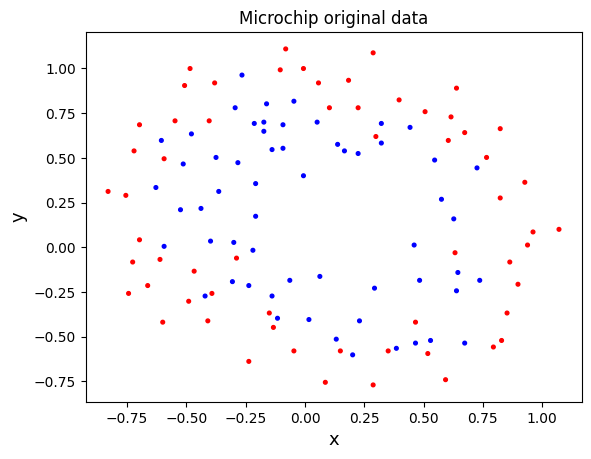

Blue → OK
Red → Fail


In [3]:
def color_plot(list):
    cols = []
    for l in list:
        if l == 1:
            cols.append("blue")
        elif l ==0:
            cols.append("red")
    return cols
plt.figure()
plt.title("Microchip original data")
plt.scatter(x=csv[:,0],y=csv[:,1],s=7,c=color_plot(csv[:,2]))
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)
plt.show()
print("Blue → OK")
print("Red → Fail")


Below is the Question 2 of Exercise 4

In [4]:
###    Three data to predict answers
x_y_test = np.array([(-0.3,1.0),(-0.5,-0.1),(0.6,0.0)])
###    Return output of result based on 1 or 0
def transfer(n):
    if n==1:
        return "OK"
    elif n==0:
        return "Fail"
###    make a numpy array of all points (x,y)
x_y = []
for csv_row in csv:
    x_y.append([csv_row[0],csv_row[1]])
x_y = np.array(x_y)
###    Now implement KNN
for i in range(1,9,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_y,csv[:,2])
    y_pred = knn.predict(x_y_test)
    print(f"K = {i}")
    print("      chip1: [-0.3, 1.0] ==>",transfer(y_pred[0]))
    print("      chip2: [-0.5, -0.1] ==>",transfer(y_pred[1]))
    print("      chip3: [0.6, 0.0] ==>",transfer(y_pred[2]))
    

K = 1
      chip1: [-0.3, 1.0] ==> OK
      chip2: [-0.5, -0.1] ==> Fail
      chip3: [0.6, 0.0] ==> Fail
K = 3
      chip1: [-0.3, 1.0] ==> Fail
      chip2: [-0.5, -0.1] ==> Fail
      chip3: [0.6, 0.0] ==> OK
K = 5
      chip1: [-0.3, 1.0] ==> Fail
      chip2: [-0.5, -0.1] ==> OK
      chip3: [0.6, 0.0] ==> OK
K = 7
      chip1: [-0.3, 1.0] ==> Fail
      chip2: [-0.5, -0.1] ==> Fail
      chip3: [0.6, 0.0] ==> OK


Below is the Question 3 of Exercise 4

From the k= 1 graph there are totally 0 training errors.
0 green errors and 0 red errors.

From the k= 3 graph there are totally 16 training errors.
6 green errors and 10 red errors.

From the k= 5 graph there are totally 17 training errors.
5 green errors and 12 red errors.

From the k= 7 graph there are totally 19 training errors.
9 green errors and 10 red errors.



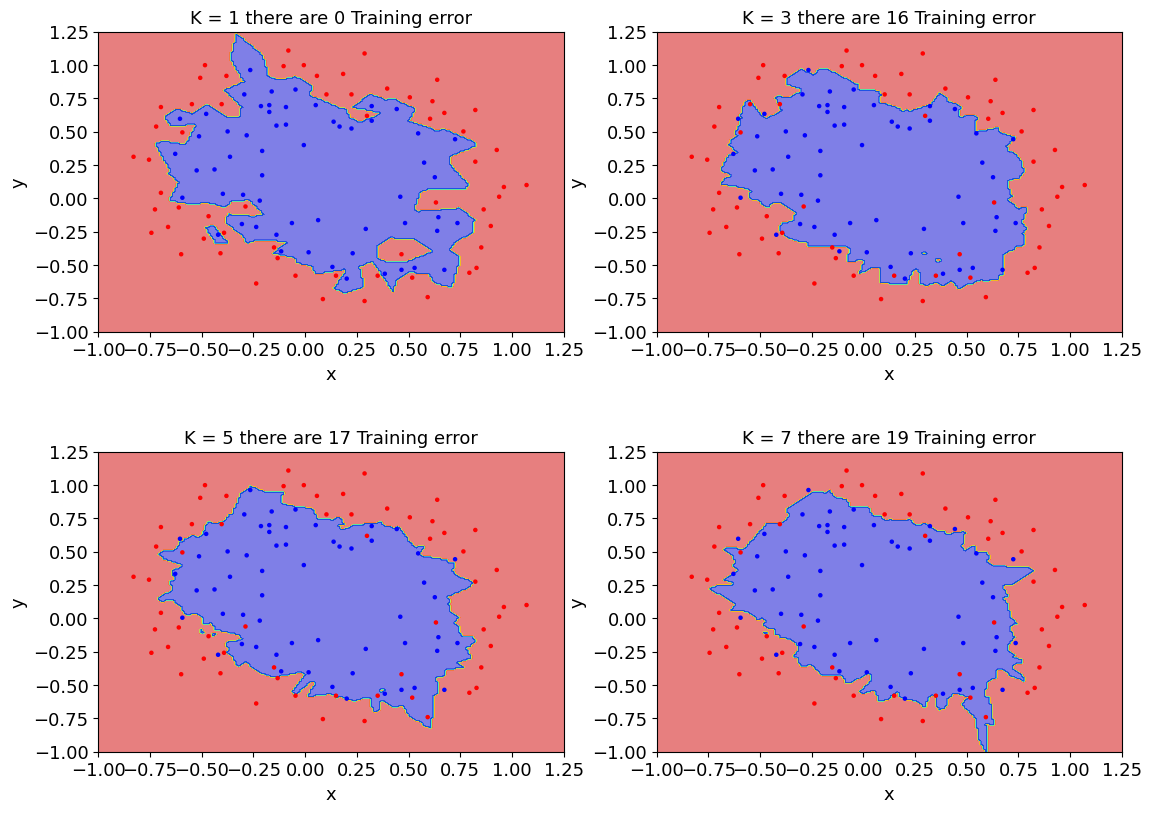

Blue → OK
Red → Fail


In [5]:
###    define the function to plot decision boundary
def de_boundary(clf):
    x_min,x_max = -1,1.25
    y_min,y_max = -1,1.25
    xs = np.linspace(x_min,x_max,200)
    ys = np.linspace(y_min,y_max,200)
    x,y = np.meshgrid(xs,ys)
    X_point = np.c_[x.ravel(),y.ravel()]
    y_pred = clf.predict(X_point).reshape(x.shape)
    plt.contourf(x,y,y_pred, cmap='jet_r',alpha=0.5)
###    define the function of color for scatter plot
def color(list):
    cols = []
    for l in list:
        if l == 1:
            cols.append("blue")
        elif l ==0:
            cols.append("red")
    return cols
color = color(csv[:,2])
###    Now implement
k_number = [1,3,5,7]
plt.figure()
for k in range(4):
    knn = KNeighborsClassifier(n_neighbors=k_number[k])
    knn.fit(x_y,csv[:,2])
    plt.subplot(2,2,k+1)
    plt.subplots_adjust(left=0.001, right=1.6, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
    num_green_error = 0
    num_red_error = 0
    de_boundary(knn)
    plt.scatter(x=csv[:,0],y=csv[:,1],s=5,c=color)
    for i in range(len(csv)):
        if csv[i][2] == 1:
            if  (knn.predict(x_y))[i] !=1:
                num_green_error +=1
        if csv[i][2] == 0:
            if  (knn.predict(x_y))[i] !=0:
                num_red_error +=1
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    plt.xlabel("x",fontsize = 13)
    plt.ylabel("y",fontsize = 13)
    plt.title(f"K = {int(2*k+1)} there are {num_green_error+num_red_error} Training error",fontsize = 13)
    print("From the k=",int(2*k+1),"graph there are totally",num_green_error+num_red_error,"training errors.")
    print(num_green_error,"green errors and",num_red_error,"red errors.")
    print("")
plt.show()
print("Blue → OK")
print("Red → Fail")
